In [1]:
import torch

In [2]:
# Solve the following system of equations:
#  x +  y +  z = 2
# 6x - 4y + 5z = 31
# 5x + 2y + 2z = 13

# Convert to matrix form XW = Y, where W is the unknown vector [x, y, z]
X = torch.tensor([[1, 1, 1], [6, -4, 5], [5, 2, 2]], dtype=torch.float32)
Y = torch.tensor([2, 31, 13], dtype=torch.float32)

In [3]:
# Solve the system of equations
W_true = torch.linalg.solve(X, Y)
print(W_true)

tensor([ 3.0000, -2.0000,  1.0000])


In [11]:
# Using neural network
#W = torch.tensor([0., 0., 0.], requires_grad=True)
g = torch.Generator().manual_seed(42)
W = torch.randn(3, requires_grad=True, generator=g)
print(f'Initial W = {W}')
losses = []
lr = 0.01
for epoch in range(5000):
    Y_pred = X @ W
    loss = torch.mean((Y_pred - Y)**2)
    losses.append(loss.item())
    loss.backward()
    with torch.no_grad():
        W -= lr * W.grad
        W.grad.zero_()
    if epoch % 200 == 0:
        print(f'Epoch {epoch}: loss = {loss.item()}, W = {W}, Y_pred = {Y_pred.detach().numpy()}')
  

Initial W = tensor([0.3367, 0.1288, 0.2345], requires_grad=True)
Epoch 0: loss = 305.3394775390625, W = tensor([ 1.8313, -0.4766,  1.3284], requires_grad=True), Y_pred = [0.69996214 2.6772163  2.4099953 ]
Epoch 200: loss = 0.0753239318728447, W = tensor([ 2.6513, -1.7899,  1.5901], requires_grad=True), Y_pred = [ 2.452855 31.018513 12.856643]
Epoch 400: loss = 0.02344093658030033, W = tensor([ 2.8055, -1.8828,  1.3292], requires_grad=True), Y_pred = [ 2.2526271 31.010326  12.920027 ]
Epoch 600: loss = 0.007294859737157822, W = tensor([ 2.8915, -1.9346,  1.1837], requires_grad=True), Y_pred = [ 2.1409292 31.005764  12.955387 ]
Epoch 800: loss = 0.0022702051792293787, W = tensor([ 2.9395, -1.9635,  1.1025], requires_grad=True), Y_pred = [ 2.0786185 31.003214  12.975112 ]
Epoch 1000: loss = 0.0007064921665005386, W = tensor([ 2.9662, -1.9797,  1.0572], requires_grad=True), Y_pred = [ 2.0438578 31.001793  12.986116 ]
Epoch 1200: loss = 0.00021986209321767092, W = tensor([ 2.9812, -1.9887, 

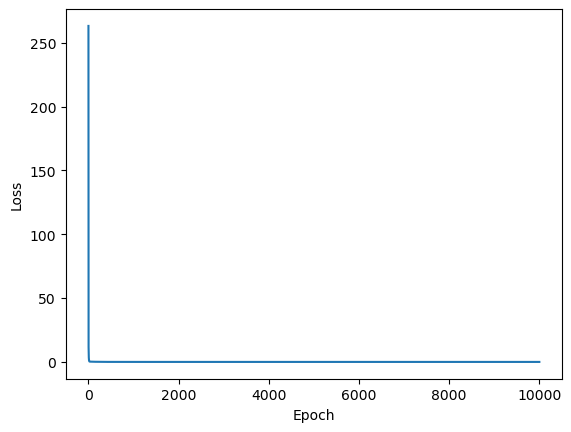

In [6]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()